# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


In [126]:
#importing numpy pandas and visualizing tools
import numpy as np
import pandas as pd

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt


In [128]:
df = pd.read_csv("911.csv") 

In [129]:
#quick info about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [130]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [131]:
#Top 5 zip codes for 911 calls
df["zip"].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [132]:
# Top 5 townships for 911 calls

df["twp"].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [133]:
# no. of unique titles 

df["title"].nunique()

110

In [134]:
# Creating a new column of reasons

df["reasons"]=df["title"].apply(lambda title:title.split(":")[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [135]:

df["reasons"].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reasons, dtype: int64

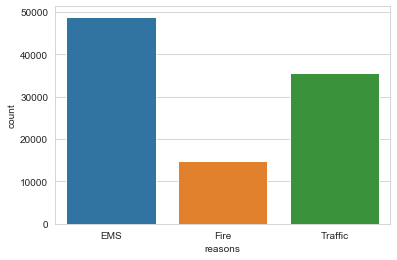

In [136]:
# Creating a countplot for visualization

sns.set_style("whitegrid")
sns.countplot(df["reasons"],data=df)

In [137]:
type(df["timeStamp"].iloc[0])

str

In [138]:
#converting timestamp into date time objects

df["timeStamp"]=pd.to_datetime(df["timeStamp"])

In [139]:
time = df["timeStamp"].iloc[0]

In [140]:
time.dayofweek

3

In [141]:
df["hour"]=df["timeStamp"].apply(lambda hours:hours.hour)
df["month"]=df["timeStamp"].apply(lambda months:months.month)
df["day_of_week"]=df["timeStamp"].apply(lambda week:week.dayofweek)
type(df["day_of_week"].iloc[0])

numpy.int64

In [142]:
# mapping Day of Week with the dmap as Day of Week is an integer value between 0-6

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df["day_of_week"]=df["day_of_week"].map(dmap)

In [143]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons,hour,month,day_of_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


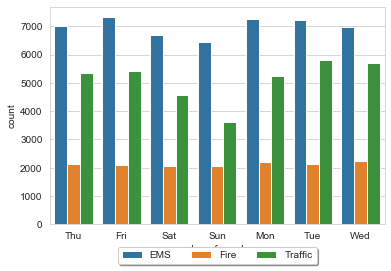

In [151]:
#countplot of the 'Day of Week' column with the hue based off of the 'Reason' column using seaborn

sns.countplot(df["day_of_week"],data=df,hue="reasons")
#For relocating the legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08),shadow=True, ncol=3)


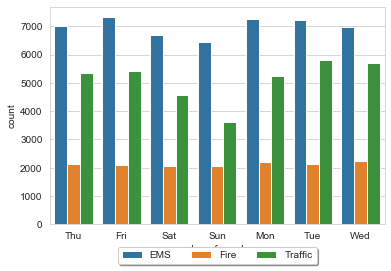

In [152]:
#Same goes for the months

sns.countplot(df["day_of_week"],data=df,hue="reasons")
#For relocating the legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08),shadow=True, ncol=3)

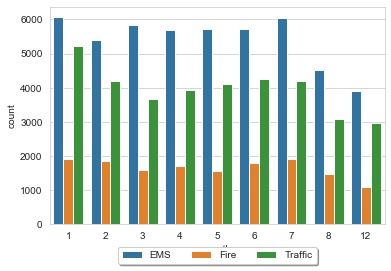

In [153]:
sns.countplot("month",data=df,hue="reasons")
#For relocating the legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08),shadow=True, ncol=3)

In [71]:

# It is missing some months! 9,10, and 11 are not there.

byMonth=df.groupby("month").count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons,hour,day_of_week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


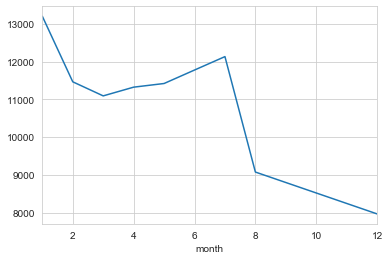

In [72]:

# A major slope or declination can be seen
byMonth["twp"].plot()

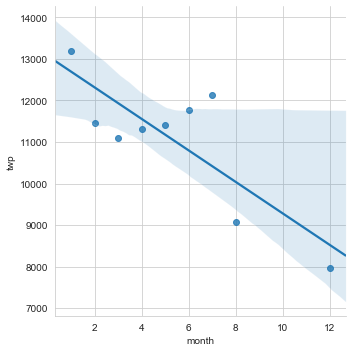

In [64]:
sns.lmplot(x="month",y="twp",data=byMonth.reset_index())

In [76]:
# No. of calls on the basis of date 
# There is no such column of date so we have to recreate the data Frame
df["date"]=df["timeStamp"].apply(lambda dates:dates.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons,hour,month,day_of_week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


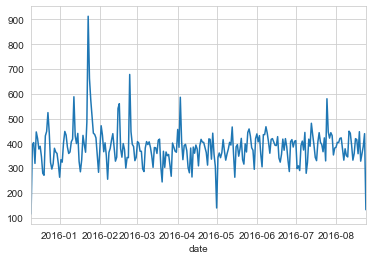

In [81]:
# Recreating this plot by making 3 seprate plots each for every reason

byDate=df.groupby(df["date"]).count()
byDate.head()
byDate["twp"].plot()

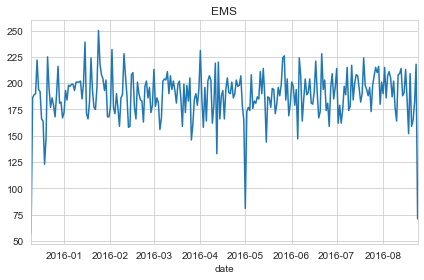

In [85]:

df[df["reasons"]=="EMS"].groupby("date").count()["twp"].plot()
plt.title("EMS")
plt.tight_layout()

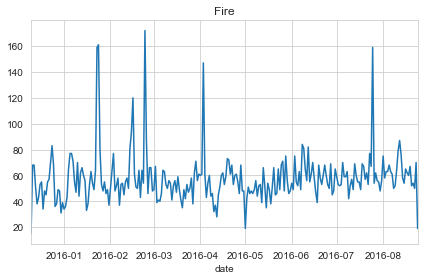

In [86]:
df[df["reasons"]=="Fire"].groupby("date").count()["twp"].plot()
plt.title("Fire")
plt.tight_layout()

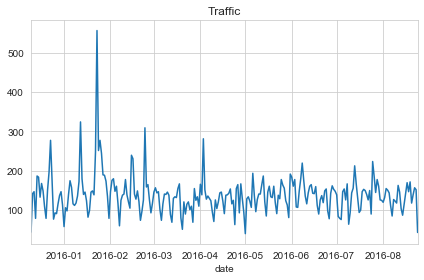

In [87]:
df[df["reasons"]=="Traffic"].groupby("date").count()["twp"].plot()
plt.title("Traffic")
plt.tight_layout()

In [94]:

# Heat Maps
#We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.
dayHour = df.groupby(by=["day_of_week","hour"]).count()["twp"].unstack()
dayHour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Mon,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Sat,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sun,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354
Tue,269,240,186,170,209,239,414,655,889,878,...,942,938,1026,1018,905,731,647,570,462,274
Wed,249,216,189,207,156,254,409,701,875,808,...,903,867,989,1036,894,686,668,574,490,334


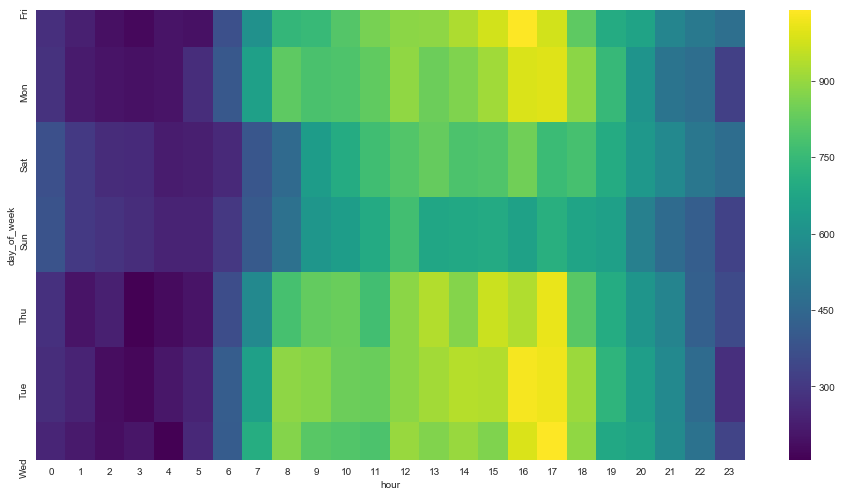

In [102]:

plt.figure(figsize=(13,7))
sns.heatmap(dayHour,cmap="viridis")
plt.tight_layout()

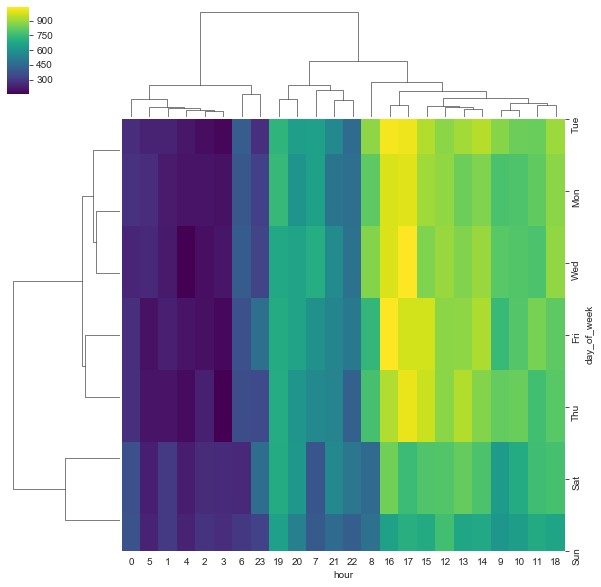

In [103]:
sns.clustermap(dayHour,cmap="viridis")

In [113]:
#repeating these same plots and operations, for a DataFrame that shows the Month as the column.
dayMonth = df.groupby(["day_of_week","month"]).count()["twp"].unstack()
dayMonth

month,1,2,3,4,5,6,7,8,12
day_of_week,,,,,,,,,
Fri,1970,1581,1523,1958,1730,1649,2045,1310,1064
Mon,1727,1964,1533,1597,1779,1617,1692,1509,1256
Sat,2290,1440,1264,1732,1444,1388,1695,1099,978
Sun,1960,1229,1100,1488,1422,1331,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1227,1265
Tue,1973,1753,1884,1430,1917,1673,1668,1612,1233
Wed,1699,1902,1888,1517,1538,2054,1715,1295,1260


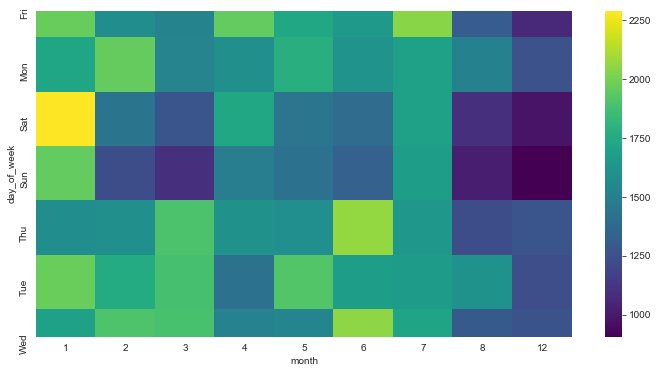

In [116]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap="viridis")

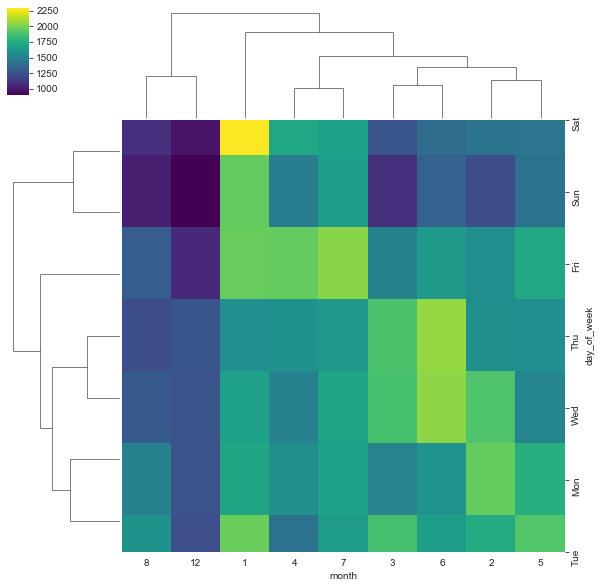

In [115]:
sns.clustermap(dayMonth,cmap="viridis")

# Visualized and Analysed by Ratnakar Maurya